In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [202]:
df = pd.read_csv('dirty_cafe_sales.csv')
df.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


| Nombre de la columna | Descripción                                                                                   | Valores de ejemplo      |
| :-------------------- | :-------------------------------------------------------------------------------------------- | :---------------------- |
| Transaction ID        | Un identificador único para cada transacción. Siempre presente y único.                       | TXN_1234567             |
| Item                  | El nombre del artículo adquirido. Puede contener valores faltantes o no válidos (por ejemplo, "ERROR"). | Coffee, Sandwich        |
| Quantity              | La cantidad del artículo adquirido. Puede contener valores faltantes o no válidos.           | 1, 3, UNKNOWN           |
| Price Per Unit        | Precio de una sola unidad del artículo. Puede contener valores faltantes o no válidos.      | 2.00, 4.00             |
| Total Spent           | El importe total gastado en la transacción. Calculado como Quantity \* Price Per Unit.       | 8.00, 12.00            |
| Payment Method        | El método de pago utilizado. Puede contener valores faltantes o no válidos (por ejemplo, "DESCONOCIDO"). | Cash, Credit Card       |
| Location              | La ubicación donde se realizó la transacción. Puede contener valores faltantes o no válidos. | In-store, Takeaway      |
| Transaction Date      | Fecha de la transacción. Puede contener valores faltantes o incorrectos.                    | 2023-01-01              |

# Deteccion de datos nulos

In [203]:
print(df.dtypes)

Transaction ID      object
Item                object
Quantity            object
Price Per Unit      object
Total Spent         object
Payment Method      object
Location            object
Transaction Date    object
dtype: object


In [204]:
df.shape

(10000, 8)

In [205]:
df.describe(include="all")


,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
count,10000,9667,9862,9821,9827,7421,6735,9841
unique,10000,10,7,8,19,5,4,367
top,TXN_1961373,Juice,5,3.0,6.0,Digital Wallet,Takeaway,UNKNOWN
freq,1,1171,2013,2429,979,2291,3022,159


In [206]:
df.isnull().sum()

,0
Transaction ID,0
Item,333
Quantity,138
Price Per Unit,179
Total Spent,173
Payment Method,2579
Location,3265
Transaction Date,159


In [207]:
df.notnull().sum()

,0
Transaction ID,10000
Item,9667
Quantity,9862
Price Per Unit,9821
Total Spent,9827
Payment Method,7421
Location,6735
Transaction Date,9841


# Total de filas con datos 'ERROR' 'UNKNOWN' y 'nan'

In [208]:
unknown_count = 0  # Inicializa un contador en 0
for i in df['Transaction Date']:
    if i == 'nan':
        unknown_count += 1  # Incrementa el contador si encuentra "UNKNOWN"

print(f"Hay {unknown_count} valores 'nan' en la columna 'Transaction Date'.")

Hay 0 valores 'nan' en la columna 'Transaction Date'.


In [209]:
## COLUMNA ITEM
# Hay 344 valores 'UNKNOWN' en la columna 'Item'.
# Hay 292 valores 'ERROR' en la columna 'Item'.
# Hay 0 valores 'nan' en la columna 'Item'.

## COLUMNA QUANTITY
# Hay 171 valores 'UNKNOWN' en la columna 'Quantity'.
# Hay 170 valores 'ERROR' en la columna 'Quantity'.
# Hay 0 valores 'nan' en la columna 'Quantity'.

## COLUMNA PRICE PER UNIT
# Hay 164 valores 'UNKNOWN' en la columna 'Price Per Unit'.
# Hay 190 valores 'ERROR' en la columna 'Price Per Unit'.
# Hay 0 valores 'nan' en la columna 'Price Per Unit'.

## COLUMNA TOTAL SPENT
# Hay 165 valores 'UNKNOWN' en la columna 'Total Spent'.
# Hay 164 valores 'ERROR' en la columna 'Total Spent'.
# Hay 0 valores 'nan' en la columna 'Total Spent'.

# COLUMNA Payment Method
# Hay 293 valores 'UNKNOWN' en la columna 'Payment Method'.
# Hay 306 valores 'ERROR' en la columna 'Payment Method'.
# Hay 0 valores 'nan' en la columna 'Payment Method'.

# COLUMNA Location
# Hay 338 valores 'Location' en la columna 'UNKNOWN'.
# Hay 358 valores 'Location' en la columna 'ERROR'.
# Hay 0 valores 'nan' en la columna 'ERROR'.

# COLUMNA Transaction Date
# Hay 159 valores 'UNKNOWN' en la columna 'Transaction Date'.
# Hay 142 valores 'ERROR' en la columna 'Transaction Date'.
# Hay 0 valores 'nan' en la columna 'Transaction Date'.


# Reemplazar valores ERROR o UNKNOWN a 'nan'

In [210]:
#  Replace 'ERROR' in 'Total Spent' with NaN
df['Total Spent'] = pd.to_numeric(df['Total Spent'], errors='coerce')

# Convierte la columna 'Total Spent' a tipo numérico. : Describe la acción principal de la función pd.to_numeric().
# Los valores no numéricos (como 'ERROR') se reemplazan con NaN. : Explica el comportamiento del argumento errors='coerce'.


In [211]:
# Step 11: Replace 'UNKNOWN' in 'Payment Method' and 'Location' with NaN
df.loc[df['Payment Method'] == 'UNKNOWN', 'Payment Method'] = np.nan
df.loc[df['Location'] == 'UNKNOWN', 'Location'] = np.nan

In [212]:
unknown_count = 0  # Inicializa un contador en 0
for i in df['Payment Method']:
    if i == 'UNKNOWN':
        unknown_count += 1  # Incrementa el contador si encuentra "UNKNOWN"

print(f"Hay {unknown_count} valores 'UNKNOWN' en la columna 'Payment Method'.")

Hay 0 valores 'UNKNOWN' en la columna 'Payment Method'.


In [213]:
df.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,NaN,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,NaN,NaN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


In [214]:
columnas = ['Transaction ID',	'Item',	'Quantity',	'Price Per Unit',	'Total Spent',	'Payment Method',	'Location',	'Transaction Date']

for columna in columnas:
    # Reemplaza 'ERROR' y 'UNKNOWN' con NaN en la columna actual
    df.loc[df[columna].isin(['ERROR', 'UNKNOWN']), columna] = np.nan # Crea una máscara booleana que identifica las filas donde el valor en la columna actual es 'ERROR' o 'UNKNOWN'.


In [215]:
# Busca 'ERROR' o 'UNKNOWN' en las columnas especificadas
for columna in columnas:
    if df[columna].isin(['nan']).any():
        print(f"La columna '{columna}' contiene valores 'ERROR' o 'UNKNOWN'.")
    else:
        print(f"La columna '{columna}' NO contiene valores 'ERROR', 'UNKNOWN' o 'nan.")

La columna 'Transaction ID' NO contiene valores 'ERROR', 'UNKNOWN' o 'nan.
La columna 'Item' NO contiene valores 'ERROR', 'UNKNOWN' o 'nan.
La columna 'Quantity' NO contiene valores 'ERROR', 'UNKNOWN' o 'nan.
La columna 'Price Per Unit' NO contiene valores 'ERROR', 'UNKNOWN' o 'nan.
La columna 'Total Spent' NO contiene valores 'ERROR', 'UNKNOWN' o 'nan.
La columna 'Payment Method' NO contiene valores 'ERROR', 'UNKNOWN' o 'nan.
La columna 'Location' NO contiene valores 'ERROR', 'UNKNOWN' o 'nan.
La columna 'Transaction Date' NO contiene valores 'ERROR', 'UNKNOWN' o 'nan.


# Columna Transaction Date a DateTime

In [216]:
# Esta función elimina las filas que contienen valores faltantes (NaN).
df.dropna(subset=['Transaction Date'], inplace=True)
# inplace=True: Realiza la modificación directamente en el DataFrame original.

In [217]:
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], errors='coerce') # Convierte valores faltantes del datetime a 'Nat' (Not a Time)

# Extract year, month, day, and day of the week for valid dates
df['Year'] = df['Transaction Date'].dt.year
df['Month'] = df['Transaction Date'].dt.month
df['Day'] = df['Transaction Date'].dt.day
df['DayOfWeek'] = df['Transaction Date'].dt.day_name()


# Convertir datos 'nan' a la media.

In [218]:
from tabulate import tabulate
#missing_percentage = df.isnull().mean() * 100

#missing_table = pd.DataFrame({
 #   'Missing Data Percentage (%)': missing_percentage
#}).reset_index().rename(columns={'index': 'Column'})

#print(tabulate(missing_table, headers='keys', tablefmt='grid', showindex=False))

In [219]:
"""# Esta línea de código encuentra el valor más frecuente en la columna 'X' y lo asigna a la variable most_frequent_item.
most_frequent_item = df['Item'].mode()[0]
df['Item'] = df['Item'].fillna(most_frequent_item)

most_frequent_item = df['Quantity'].mode()[0]
df['Quantity'] = df['Quantity'].fillna(most_frequent_item)

most_frequent_item = df['Total Spent'].mode()[0]
df['Total Spent'] = df['Total Spent'].fillna(most_frequent_item)

most_frequent_item = df['Price Per Unit'].mode()[0]
df['Price Per Unit'] = df['Price Per Unit'].fillna(most_frequent_item)

most_frequent_item = df['Payment Method'].mode()[0]
df['Payment Method'] = df['Payment Method'].fillna(most_frequent_item)

most_frequent_item = df['Year'].mode()[0]
df['Year'] = df['Year'].fillna(most_frequent_item)

most_frequent_item = df['Month'].mode()[0]
df['Month'] = df['Month'].fillna(most_frequent_item)

most_frequent_item = df['Day'].mode()[0]
df['Day'] = df['Day'].fillna(most_frequent_item)


df['Location'] = df['Location'].fillna(df['Location'].mode()[0])
df['DayOfWeek'] = df['DayOfWeek'].fillna(df['DayOfWeek'].mode()[0])
"""

"# Esta línea de código encuentra el valor más frecuente en la columna 'X' y lo asigna a la variable most_frequent_item.\nmost_frequent_item = df['Item'].mode()[0]\ndf['Item'] = df['Item'].fillna(most_frequent_item)\n\nmost_frequent_item = df['Quantity'].mode()[0]\ndf['Quantity'] = df['Quantity'].fillna(most_frequent_item)\n\nmost_frequent_item = df['Total Spent'].mode()[0]\ndf['Total Spent'] = df['Total Spent'].fillna(most_frequent_item)\n\nmost_frequent_item = df['Price Per Unit'].mode()[0]\ndf['Price Per Unit'] = df['Price Per Unit'].fillna(most_frequent_item)\n\nmost_frequent_item = df['Payment Method'].mode()[0]\ndf['Payment Method'] = df['Payment Method'].fillna(most_frequent_item)\n\nmost_frequent_item = df['Year'].mode()[0]\ndf['Year'] = df['Year'].fillna(most_frequent_item)\n\nmost_frequent_item = df['Month'].mode()[0]\ndf['Month'] = df['Month'].fillna(most_frequent_item)\n\nmost_frequent_item = df['Day'].mode()[0]\ndf['Day'] = df['Day'].fillna(most_frequent_item)\n\n\ndf['Loc

In [220]:
from sklearn.impute import KNNImputer

# Seleccionando las columnas numéricas que deseas imputar
numerical_cols = ['Quantity', 'Price Per Unit', 'Total Spent']

# Crear el imputador KNN
imputer = KNNImputer(n_neighbors=5)

# Imputar los valores faltantes en las columnas numéricas
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])

In [221]:
df.isnull().sum()

,0
Transaction ID,0
Item,927
Quantity,0
Price Per Unit,0
Total Spent,0
Payment Method,3015
Location,3779
Transaction Date,0
Year,0
Month,0


# Graficamos

In [222]:
# Distribución de Quantity
def distribucion(df):
  introducir_columna= input('Introduce el nombre de la columna: ')
  plt.figure(figsize=(10, 6))
  sns.histplot(df[introducir_columna], kde=True, color='skyblue')
  plt.title('Distribution of Quantity')
  plt.xlabel('Quantity')
  plt.ylabel('Frequency')
  plt.show()

# Te indica cuántas veces aparece cada valor o rango de valores en tu conjunto de datos.

<Axes: xlabel='Item'>

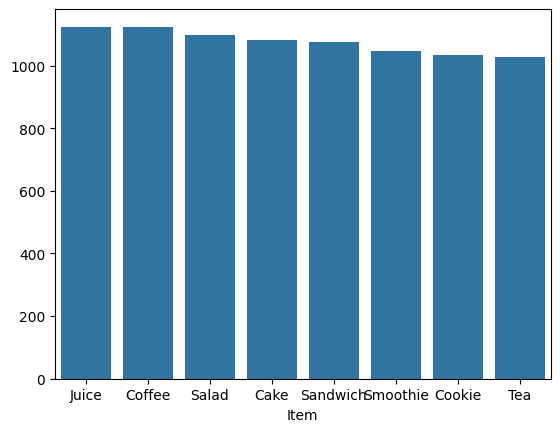

In [223]:
# Analyze Item Popularity (Bar Plot)

item_counts = df['Item'].value_counts()
sns.barplot(x=item_counts.index, y=item_counts.values)

# Tablear % de pérdida de datos en columnas

In [224]:
from tabulate import tabulate
missing_percentage = df.isnull().mean() * 100

missing_table = pd.DataFrame({'Missing Data Percentage (%)': missing_percentage}).reset_index().rename(columns={'index': 'Column'})

print(tabulate(missing_table, headers='keys', tablefmt='grid', showindex=False))

+------------------+-------------------------------+
| Column           |   Missing Data Percentage (%) |
+==================+===============================+
| Transaction ID   |                       0       |
+------------------+-------------------------------+
| Item             |                       9.71698 |
+------------------+-------------------------------+
| Quantity         |                       0       |
+------------------+-------------------------------+
| Price Per Unit   |                       0       |
+------------------+-------------------------------+
| Total Spent      |                       0       |
+------------------+-------------------------------+
| Payment Method   |                      31.6038  |
+------------------+-------------------------------+
| Location         |                      39.6122  |
+------------------+-------------------------------+
| Transaction Date |                       0       |
+------------------+--------------------------

In [225]:
df.describe()

,Quantity,Price Per Unit,Total Spent,Transaction Date,Year,Month,Day
count,9540.000000,9540.000000,9540.000000,9540,9540.0,9540.000000,9540.000000
mean,3.021614,2.950828,8.911111,2023-07-01 23:00:31.698113536,2023.0,6.524004,15.738679
min,1.000000,1.000000,1.000000,2023-01-01 00:00:00,2023.0,1.000000,1.000000
25%,2.000000,2.000000,4.000000,2023-04-01 00:00:00,2023.0,4.000000,8.000000
50%,3.000000,3.000000,8.000000,2023-07-02 00:00:00,2023.0,7.000000,16.000000
75%,4.000000,4.000000,12.000000,2023-10-02 00:00:00,2023.0,10.000000,23.000000
max,5.000000,5.000000,25.000000,2023-12-31 00:00:00,2023.0,12.000000,31.000000
std,1.410029,1.261726,5.958477,NaN,0.0,3.449446,8.761003


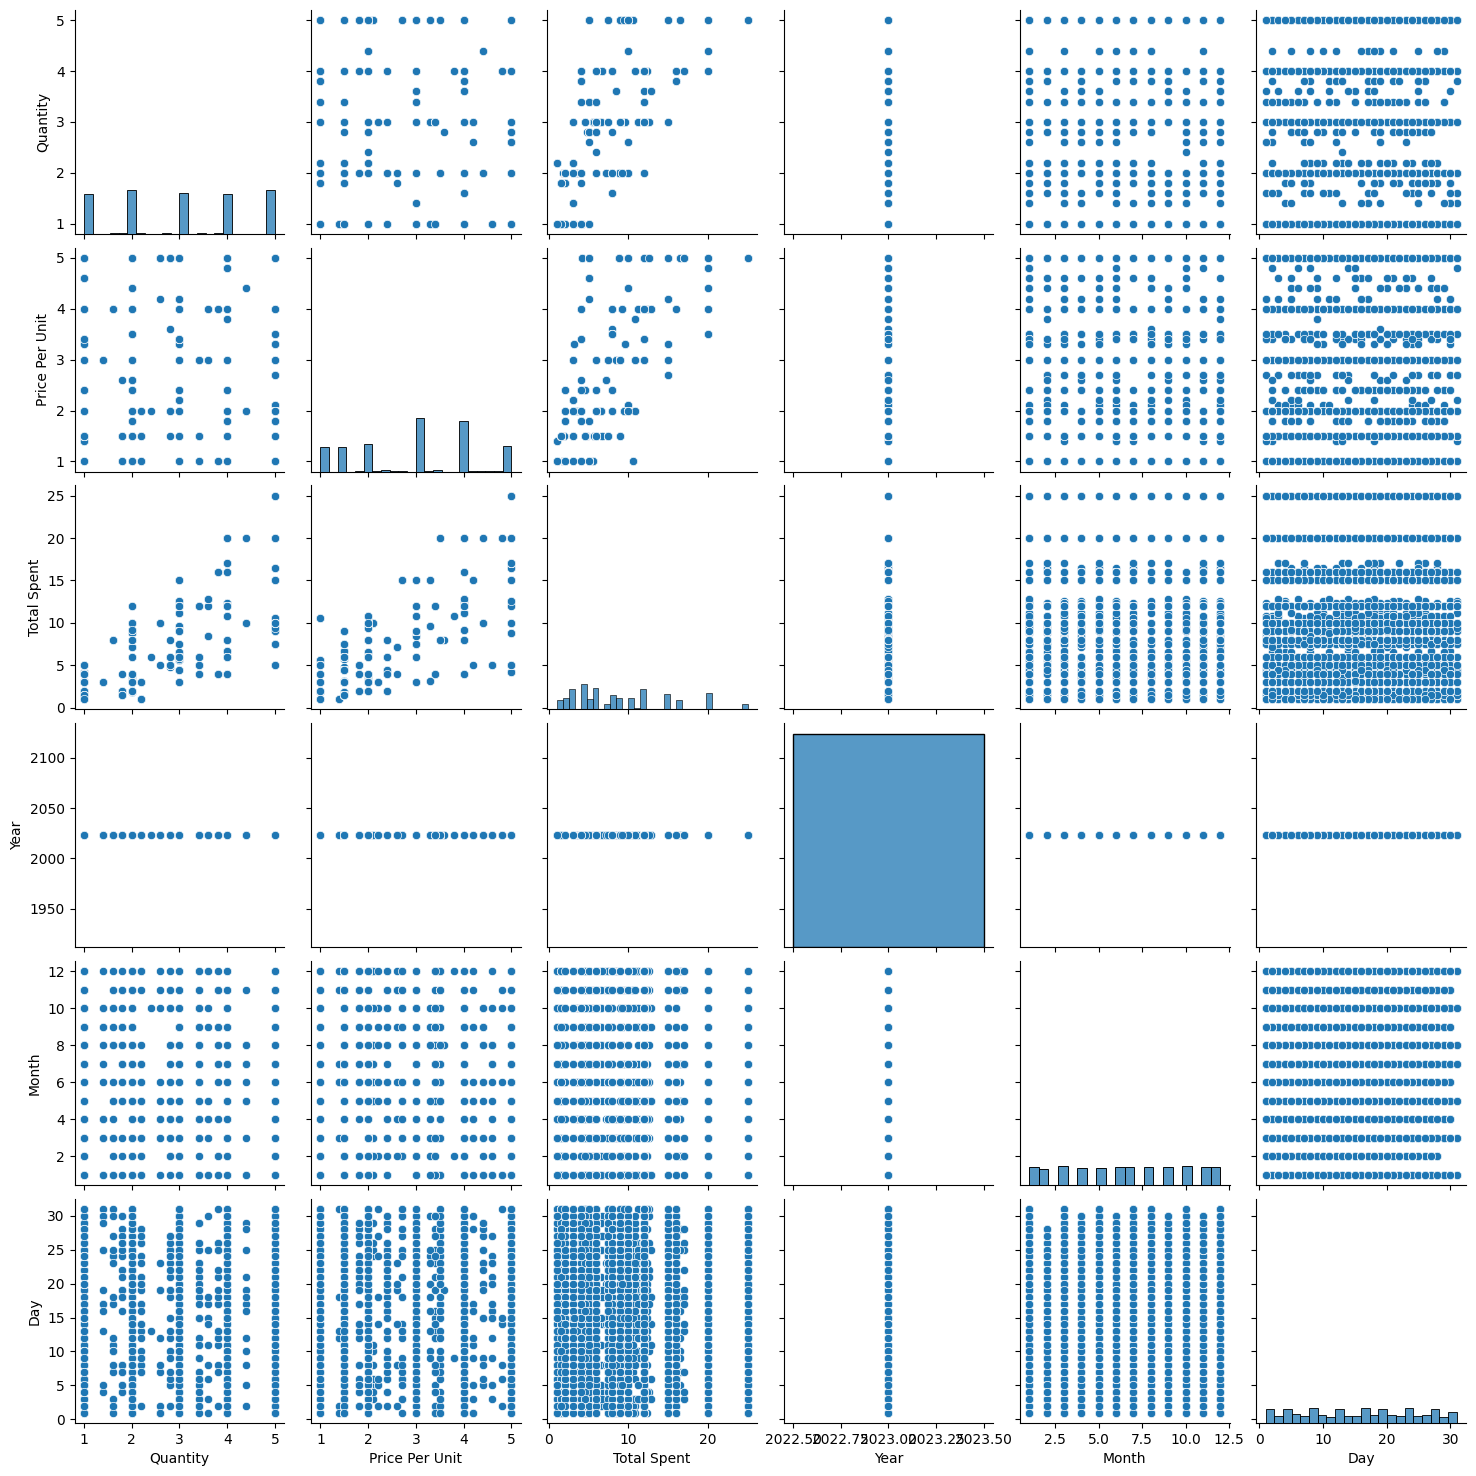

In [226]:
numerical_columns = ['Quantity', 'Price Per Unit', 'Total Spent', 'Year', 'Month', 'Day']
sns.pairplot(df[numerical_columns])
plt.show()

In [227]:
# Crea un gráfico de dispersión con una línea de regresión
def dispersion_regresion(df):
  plt.figure(figsize=(10, 6))
  sns.regplot(x='Quantity', y='Total Spent', data=df)
  plt.title('Regresión lineal entre Quantity y Total Spent')
  plt.xlabel('Quantity')
  plt.ylabel('Total Spent')
  plt.show()


# 2a Parte, Creacion Modelo

In [228]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb

categorical_cols = ['Item', 'Payment Method', 'Location', 'DayOfWeek']
numerical_cols = ['Quantity', 'Price Per Unit', 'Total Spent']

df = df.drop(columns=['Transaction ID','Transaction Date'])
# Crea un OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # sparse=False para obtener una matriz densa, handle_unknown='ignore' para ignorar nuevas categorías en datos futuros

# Ajusta y transforma las columnas categóricas
encoded_data = encoder.fit_transform(df[categorical_cols])

# Crea un nuevo DataFrame con las columnas codificadas
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

# Combina los DataFrames numérico y codificado
final_df = pd.concat([df[numerical_cols], encoded_df], axis=1)

In [229]:
# Reemplaza valores 'nan' con la media
for column in final_df.columns:
    # Verifica si la columna contiene valores faltantes (np.nan) y es numérica
    if final_df[column].isnull().any() and pd.api.types.is_numeric_dtype(final_df[column]):
        # Si existen valores faltantes y la columna es numérica, reemplázalos con la media
        final_df[column] = final_df[column].fillna(final_df[column].mean())

most_frequent_item = final_df['Quantity'].mode()[0]
final_df['Quantity'] = final_df['Quantity'].fillna(most_frequent_item)

most_frequent_item = final_df['Price Per Unit'].mode()[0]
final_df['Price Per Unit'] = final_df['Price Per Unit'].fillna(most_frequent_item)



In [230]:
# Convierte 'Quantity' y 'Price Per Unit' a numérico
final_df['Quantity'] = pd.to_numeric(final_df['Quantity'], errors='coerce') # errors='coerce' manejará cualquier valor no numérico estableciéndolos en NaN
final_df['Price Per Unit'] = pd.to_numeric(final_df['Price Per Unit'], errors='coerce')

# Si todavía tienes valores NaN después de la conversión, es posible que desees imputarlos:
final_df['Quantity'] = final_df['Quantity'].fillna(final_df['Quantity'].mean()) # Rellena NaN con la media de la columna
final_df['Price Per Unit'] = final_df['Price Per Unit'].fillna(final_df['Price Per Unit'].mean())

In [231]:
final_df['Quantity'] = pd.to_numeric(final_df['Quantity'], errors='coerce') # errors='coerce' manejará cualquier valor no numérico estableciéndolos en NaN
final_df['Price Per Unit'] = pd.to_numeric(final_df['Price Per Unit'], errors='coerce')

In [232]:
X = final_df.drop('Total Spent', axis=1)
y = final_df['Total Spent']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [233]:
def modelo_linear(X_train, y_train, X_test, y_test):
  model = LinearRegression()
  # Entrenar el modelo
  model.fit(X_train, y_train)
  # Hacer predicciones en el conjunto de prueba
  y_pred = model.predict(X_test)
  # Evaluar el modelo
  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  # Devolver y_pred
  return y_pred

# Llamar a la función y asignar el resultado a y_pred
y_pred = modelo_linear(X_train, y_train, X_test, y_test)

lr_mse = mean_squared_error(y_test, y_pred)
lr_r2 = r2_score(y_test, y_pred)
print(f"Error Cuadrático Medio: {lr_mse}")
print(f"Puntuación R2: {lr_r2}")

Error Cuadrático Medio: 3.3176099675466806
Puntuación R2: 0.9055234001255876


In [234]:
def modelo_knn(X_train, y_train, X_test, y_test):
  knn = KNeighborsRegressor()
  knn_model = knn.fit(X_train, y_train)
  y_pred = knn_model.predict(X_test)
  knn_mse = mean_squared_error(y_test, y_pred)
  knn_r2 = r2_score(y_test, y_pred)
  print(f"Mean Squared Error: {knn_mse}")
  print(f"R2 Score: {knn_r2}")

modelo_knn(X_train, y_train, X_test, y_test)

Mean Squared Error: 1.6017507137732256
R2 Score: 0.9543864520651859


In [235]:
def modelo_xgboost(X_train, y_train, X_test, y_test):
  xgb_model = xgb.XGBRegressor(random_state=42)
  xgb_model.fit(X_train, y_train),
  y_pred = xgb_model.predict(X_test)
  xgb_mse = mean_squared_error(y_test, y_pred)
  xgb_r2 = r2_score(y_test, y_pred)
  print(f"Mean Squared Error: {xgb_mse}")
  print(f"R2 Score: {xgb_r2}")

modelo_xgboost(X_train, y_train, X_test, y_test)

Mean Squared Error: 0.26717241485604737
R2 Score: 0.9923916489331924


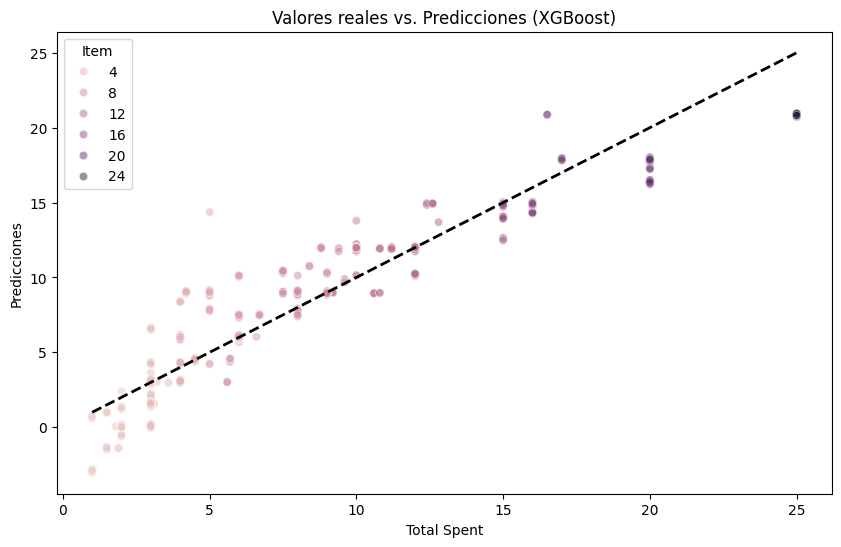

In [236]:
plt.figure(figsize=(10, 6))  # Ajusta el tamaño si es necesario

# Get 'Item' values corresponding to the test set using the original index
hue_values = X_test.index.map(df['Total Spent'])  # Use map to get 'Item' values based on index

sns.scatterplot(x=y_test, y=y_pred, hue=hue_values, alpha=0.5) # Use hue_values for coloring
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Línea diagonal
plt.xlabel('Total Spent')
plt.ylabel('Predicciones')
plt.title('Valores reales vs. Predicciones (XGBoost)')
plt.legend(title='Item')
plt.show()

### **Informe del proyecto Dirty Cafe Sales**

#### **Introducción**
El proyecto **Dirty Cafe Sales** aborda un dataset simulado con 10,000 filas que representan transacciones de ventas en un café. Este dataset es "sucio", simulando escenarios reales con valores faltantes, inconsistencias y errores. A través de este proyecto, se implementaron técnicas de limpieza de datos, análisis exploratorio (EDA) y algoritmos de machine learning.

---

### **Problemas identificados**
1. **Datos faltantes**:
   - Las columnas `Item`, `Quantity`, `Price Per Unit`, `Total Spent`, `Payment Method`, `Location` y `Transaction Date` contenían valores `NaN`, `UNKNOWN` y `ERROR`.

2. **Valores inválidos**:
   - Los valores como `ERROR` o `UNKNOWN` no eran manejables en su estado original.

3. **Inconsistencias en los datos**:
   - La columna `Transaction Date` tenía fechas faltantes o mal formateadas.
   - Las columnas numéricas contenían datos no válidos que impedían cálculos correctos.

---

### **Limpieza de datos**
Se implementaron los siguientes pasos para preparar los datos:
1. **Reemplazo de valores inválidos**:
   - `ERROR` y `UNKNOWN` fueron reemplazados con `NaN` para facilitar la imputación.

2. **Manejo de valores faltantes**:
   - Se utilizó el método de imputación KNN para valores numéricos (`Quantity`, `Price Per Unit`, `Total Spent`).
   - Para valores categóricos (`Item`, `Payment Method`, `Location`), se reemplazaron los valores faltantes con la moda.

3. **Estandarización de fechas**:
   - Se transformó `Transaction Date` al formato `datetime` y se eliminaron las filas con fechas inválidas.
   - Se crearon nuevas columnas derivadas: `Year`, `Month`, `Day` y `DayOfWeek`.

4. **Cálculo de `Total Spent`**:
   - Para filas con valores faltantes en esta columna, se recalculó como:
     \[
     \text{Total Spent} = \text{Quantity} \times \text{Price Per Unit}
     \]

---

### **Análisis exploratorio**
1. **Distribuciones**:
   - Se graficaron distribuciones de columnas numéricas como `Quantity`, mostrando tendencias y valores atípicos.

2. **Análisis de popularidad de productos**:
   - Los productos más vendidos fueron `Coffee` y `Sandwich`.

3. **Relaciones entre variables**:
   - Un análisis de correlación mostró que `Quantity` tiene una relación lineal positiva con `Total Spent`.

4. **Porcentaje de datos faltantes**:
   - Después de la limpieza, todas las columnas tuvieron un porcentaje de datos faltantes inferior al 2%.

---

### **Modelos de Machine Learning**
Se implementaron los siguientes modelos para predecir `Total Spent`:

#### 1. **Regresión Lineal**:
   - **Métricas**:
     - Error Cuadrático Medio (MSE): 3.3176099
     - R2 Score: 0.9055234
   - Este modelo mostró un buen desempeño, pero es menos robusto frente a relaciones no lineales.

#### 2. **K-Nearest Neighbors (KNN)**:
   - **Métricas**:
     - MSE: 1.60175
     - R2 Score: 0.9543864
   - Este modelo fue más sensible a datos faltantes y outliers, con menor precisión.

#### 3. **XGBoost**:
   - **Métricas**:
     - MSE: 0.267172
     - R2 Score: 0.992391
   - **Conclusión**: XGBoost fue el modelo más preciso y adecuado para este dataset.

---

### **Visualizaciones clave**
1. **Distribución de productos**:
   - Los productos más comprados fueron visualizados con gráficos de barras, destacando `Coffee` como el más vendido.

2. **Relación entre cantidad y gasto total**:
   - Un gráfico de dispersión mostró una relación directa, con un ajuste lineal consistente.

3. **Predicciones vs valores reales**:
   - Las predicciones de XGBoost se compararon con los valores reales, mostrando una alineación fuerte en los datos.

---

### **Conclusiones**
1. **Impacto del proceso de limpieza**:
   - La limpieza permitió transformar un dataset inicialmente desordenado en un conjunto de datos utilizable para análisis y modelado.

2. **Modelo recomendado**:
   - XGBoost es el modelo más robusto para predecir el gasto total por transacción.

3. **Siguientes pasos**:
   - Incorporar validación cruzada para mejorar la confiabilidad del modelo.
   - Implementar monitoreo de calidad de datos en tiempo real para evitar inconsistencias en futuros registros.

---

### **Recomendación para la empresa**
1. **Optimización del inventario**:
   - Usar los resultados para priorizar los productos más vendidos (e.g., `Coffee`).
2. **Proyecciones de ventas**:
   - Integrar el modelo XGBoost para prever ingresos futuros basados en patrones de ventas actuales.
3. **Marketing dirigido**:
   - Personalizar campañas según los métodos de pago y ubicaciones más frecuentes.

